# Ridge & Lasso Regression, ElasticNet, and Non Linear Regression

We will discuss more forms of linear regression

- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Elasticnet 

# Regularization
## Ridge Regression 

**Lasso (L1) and Ridge (L2) Regularization**
Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

- L1 regularization (also called Lasso)
- L2 regularization (also called Ridge)
- L1/L2 regularization (also called Elastic net)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

#### Difference between L1 and L2 regularization
L1 Regularization
- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 has multiple solutions
- L1 has built in feature selection
- L1 is robust to outliers
- L1 generates model that are simple and interpretable but cannot learn complex patterns

L2 Regularization
- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 has one solution
- L2 has no feature selection
- L2 is not robust to outliers
- L2 gives better prediction when output variable is a function of all input features
- L2 regularization is able to learn complex data patterns

## Recap 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

from sklearn.preprocessing import PowerTransformer
from feature_engine.outlier_removers import Winsorizer

from sklearn.feature_selection import RFE

In [3]:
data = load_boston()

boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['Price'] = data.target

features = list(data.feature_names)
print('features:\n', features)

boston.head()

features:
 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Outliers Removal Selected
Transformations Selected


C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


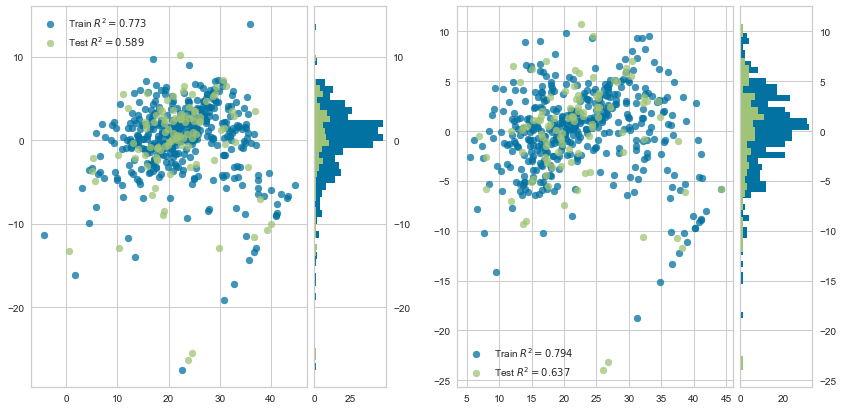

In [4]:
def run_Outliers_Transformations_Linear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(boston[features], features)

Transformations Selected


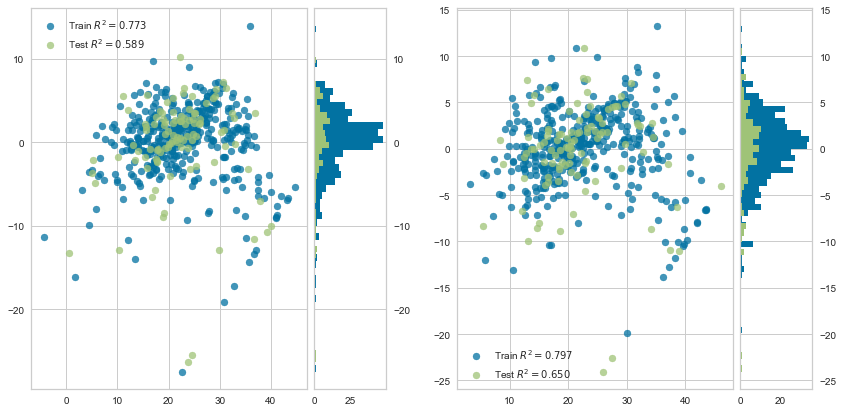

In [6]:
best_features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
run_Outliers_Transformations_Linear_Regression(boston[best_features], best_features, outliers=False)

Outliers Removal Selected
Transformations Selected


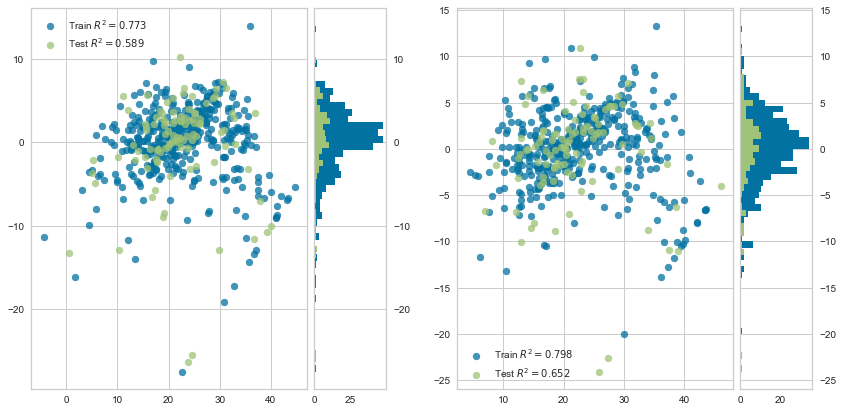

In [9]:
best_features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
outliers_features = ['LSTAT', 'DIS']
run_Outliers_Transformations_Linear_Regression(boston[best_features], outliers_features, outliers=True)

## Ridge Regression

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

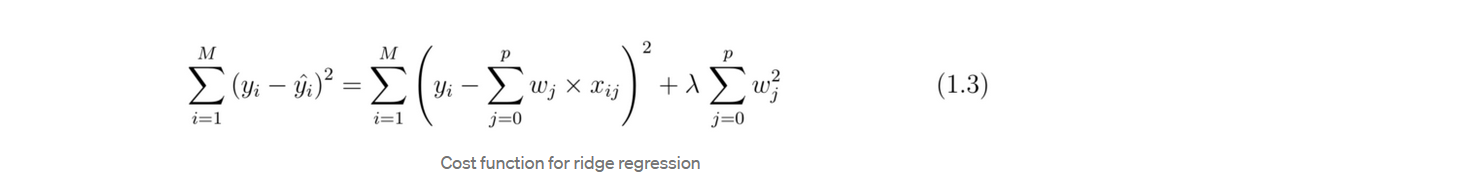

So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized.

**ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.**

In [12]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

model = Ridge(alpha=.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5890993204933793


In [21]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

model = RidgeCV(alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3), scoring='r2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5886082435817698


In [22]:
model.alpha_

0.05

## Lasso 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

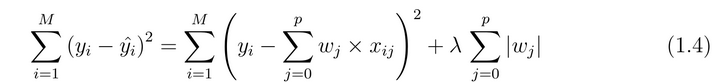

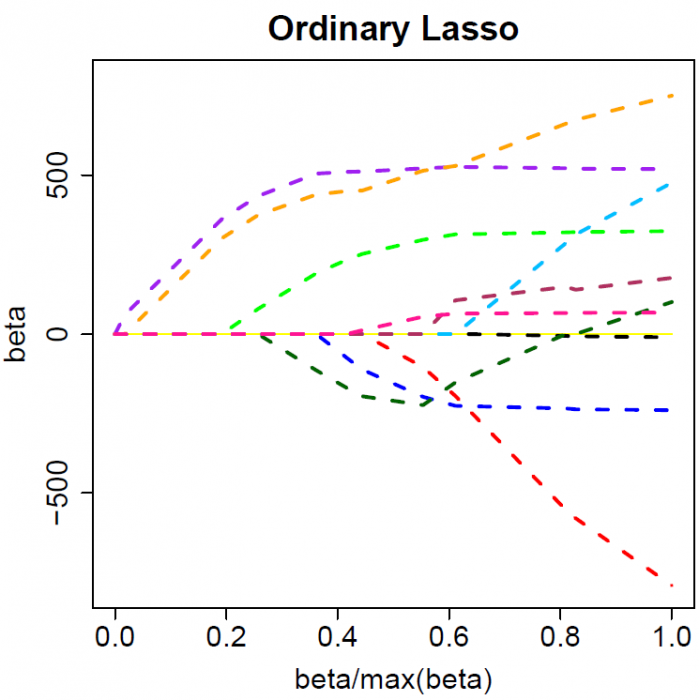

Length of the path. eps=1e-3 means that alpha_min / alpha_max = 1e-3 which is shown as beta in above figure

In [23]:
from sklearn.linear_model import LassoCV

In [28]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

model = LassoCV(eps=0.0001, n_alphas=100, cv=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5520716186934744


In [29]:
model.coef_

array([-0.10898963,  0.04834513, -0.03500731,  0.        , -0.        ,
        3.3892828 , -0.01121833, -1.07787038,  0.21356208, -0.01336957,
       -0.89991651,  0.00912422, -0.54282281])

In [30]:
pd.Series(model.coef_, features)

CRIM      -0.108990
ZN         0.048345
INDUS     -0.035007
CHAS       0.000000
NOX       -0.000000
RM         3.389283
AGE       -0.011218
DIS       -1.077870
RAD        0.213562
TAX       -0.013370
PTRATIO   -0.899917
B          0.009124
LSTAT     -0.542823
dtype: float64

## Elastic Net 

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds.

In [31]:
from sklearn.linear_model import ElasticNetCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], tol=0.01, alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5849610092179705


In [33]:
pd.Series(model.coef_, features)

CRIM       -0.117837
ZN          0.045328
INDUS      -0.007173
CHAS        2.197912
NOX       -12.502410
RM          3.719366
AGE        -0.006276
DIS        -1.330245
RAD         0.233853
TAX        -0.011290
PTRATIO    -1.009690
B           0.008324
LSTAT      -0.496980
dtype: float64

## Polynomial Regression 

- Linear Regression

    - **$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $**
---

- Polynomial Regression

    - **$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$**


In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
X_train, X_test, y_train, y_test = train_test_split(boston[features],
                boston['Price'],
                test_size=0.2,
                random_state=0)

polynomial = PolynomialFeatures(degree=2)
X_train = polynomial.fit_transform(X_train)
X_test = polynomial.transform(X_test)



In [36]:
X_train.shape

(404, 105)

In [39]:
def run_Linear_Regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()    
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
    

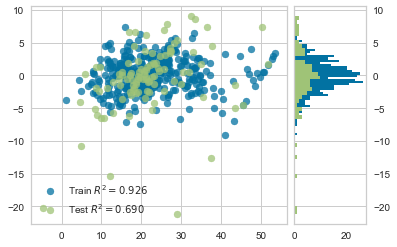

In [40]:
run_Linear_Regression(X_train, X_test, y_train, y_test)

## Polynomial Regression with Variable Transformations 

Outliers Removal Selected
Transformations Selected


C:\Users\laxmi\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


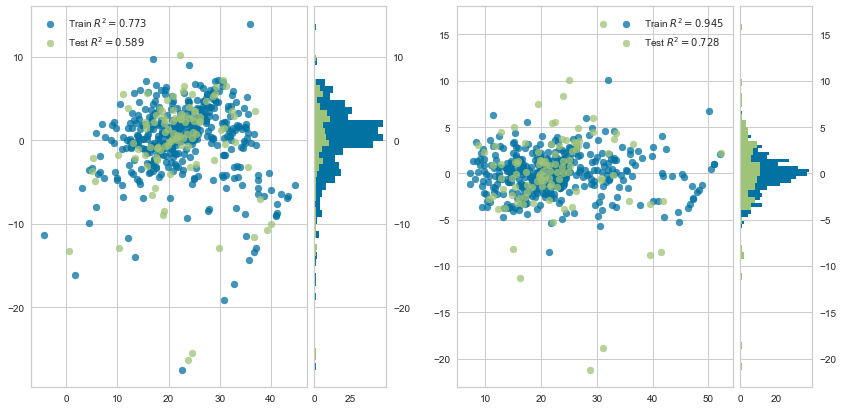

In [45]:
def run_Outliers_Transformations_NonLinear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(boston[features], boston['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, boston['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
        
        
    # non linear transformations
    polynomial = PolynomialFeatures(degree=2)
    X_train = polynomial.fit_transform(X_train)
    X_test = polynomial.transform(X_test)
    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_NonLinear_Regression(boston[features], features, 
                                                  outliers=True, transformations=True)

## Polynomial Regression with Feature Selection 

In [53]:
def increamental_RFE(n_features_to_select):
    X_train, X_test, y_train, y_test = train_test_split(boston[features],
                    boston['Price'],
                    test_size=0.2,
                    random_state=0)

    model = LinearRegression()

    selector = RFE(model, n_features_to_select=n_features_to_select, step=1)
    selector.fit(X_train, y_train)

    selected_features = list(X_train.columns[selector.support_])
    print('Selected Features for Training: ', selected_features)
    
    
    outliers_features = ['LSTAT', 'DIS']

    run_Outliers_Transformations_NonLinear_Regression(boston[selected_features], outliers_features,
                                              outliers=False, transformations=True)

Selected Features for Training:  ['NOX']
Transformations Selected


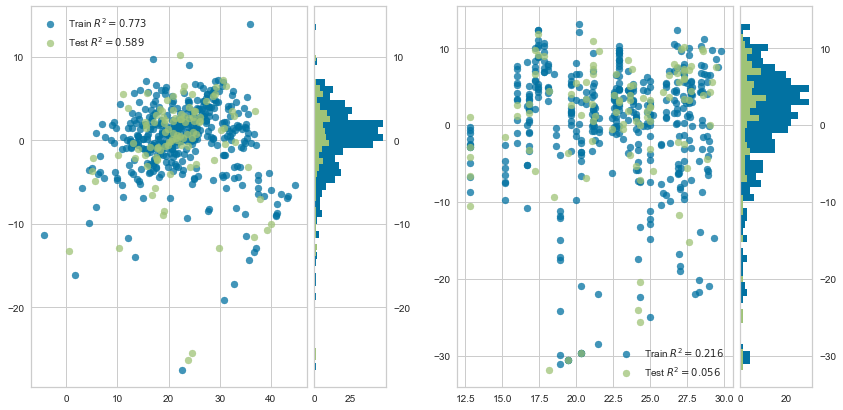




Selected Features for Training:  ['NOX', 'RM']
Transformations Selected


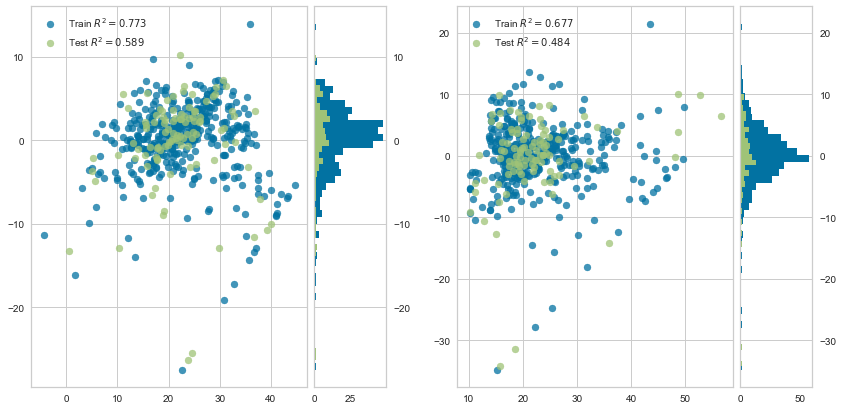




Selected Features for Training:  ['CHAS', 'NOX', 'RM']
Transformations Selected


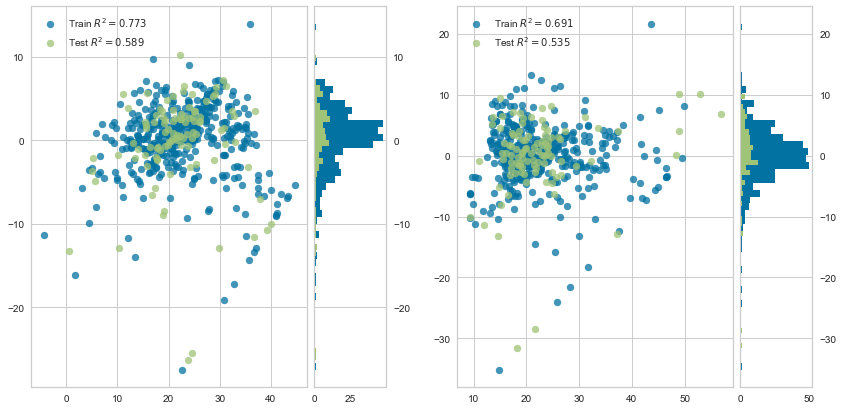




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'PTRATIO']
Transformations Selected


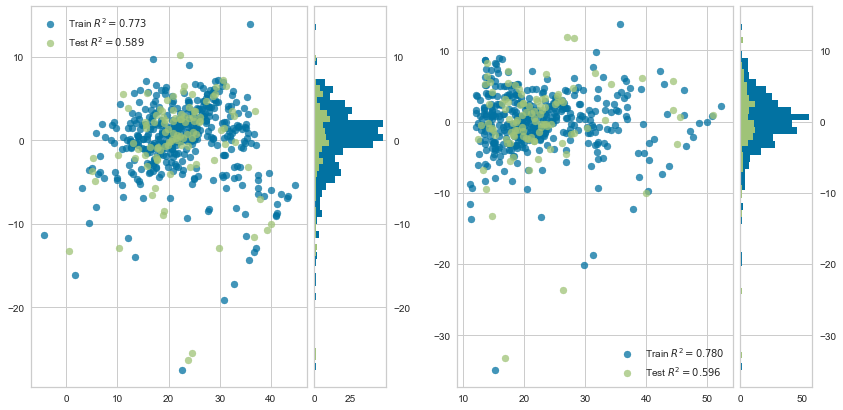




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO']
Transformations Selected


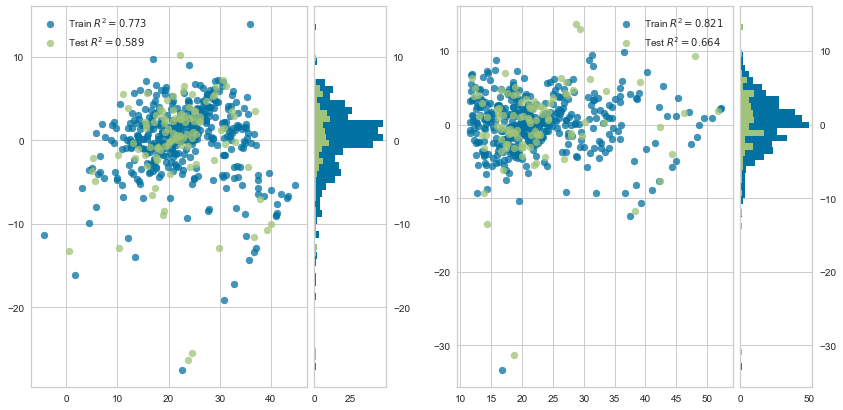




Selected Features for Training:  ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
Transformations Selected


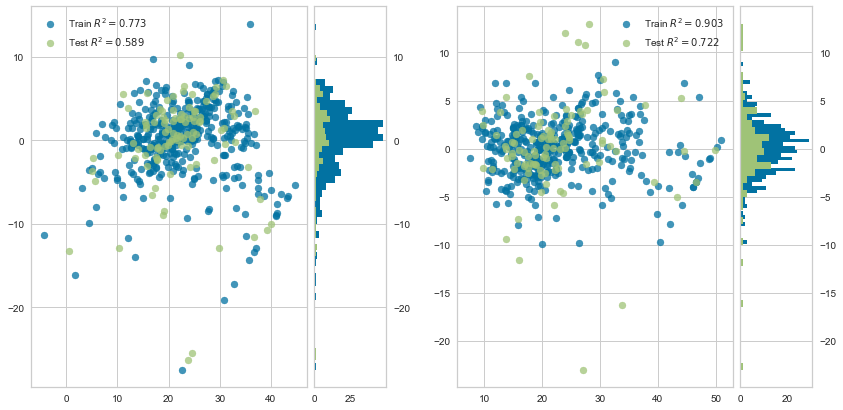




Selected Features for Training:  ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
Transformations Selected


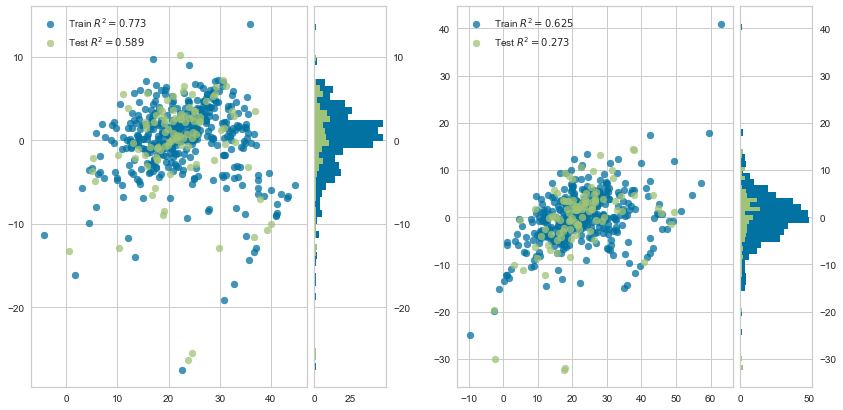




Selected Features for Training:  ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
Transformations Selected


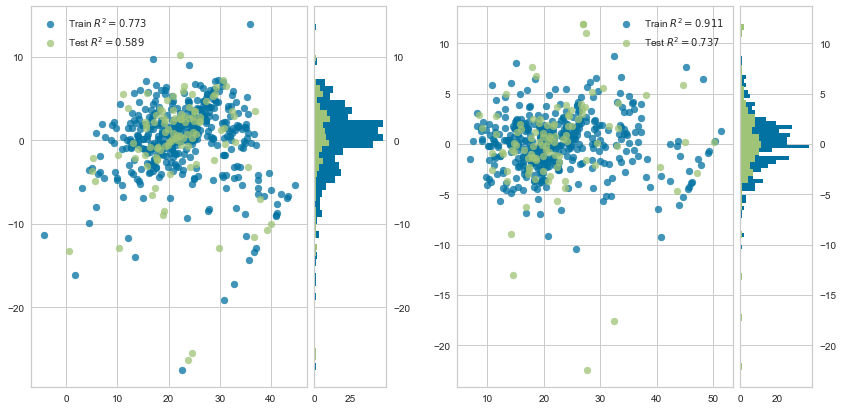




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
Transformations Selected


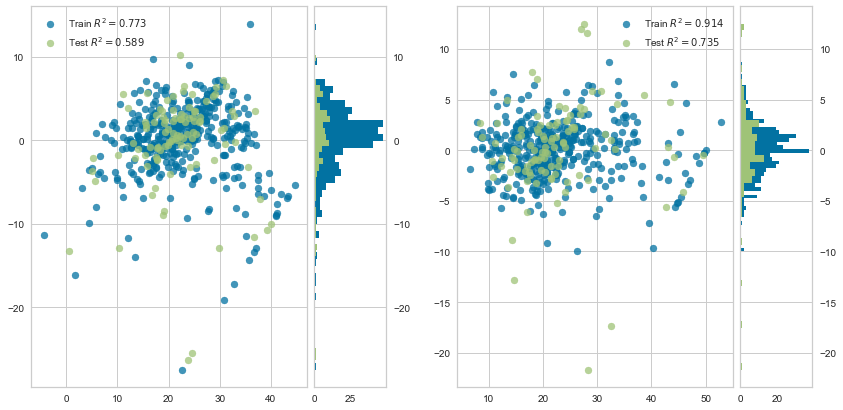




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Transformations Selected


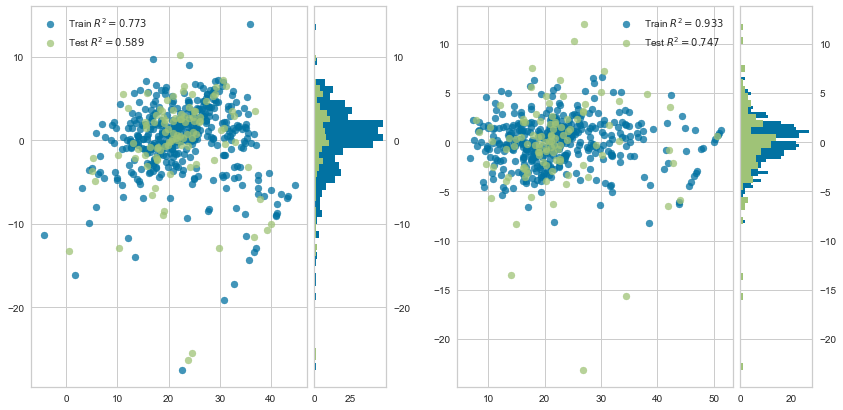




Selected Features for Training:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


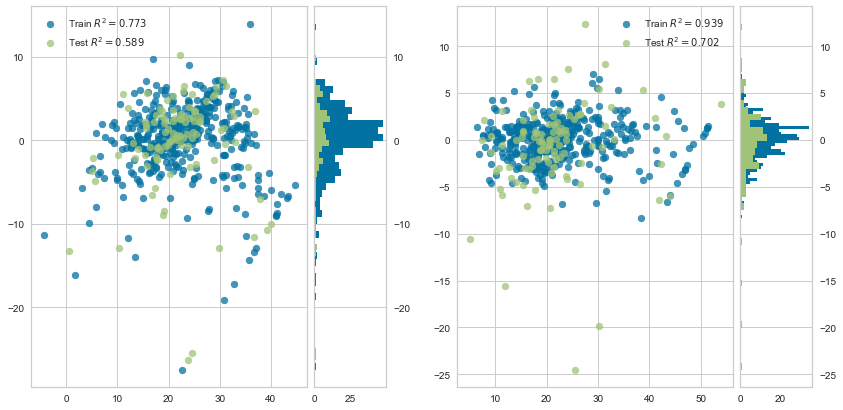




Selected Features for Training:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


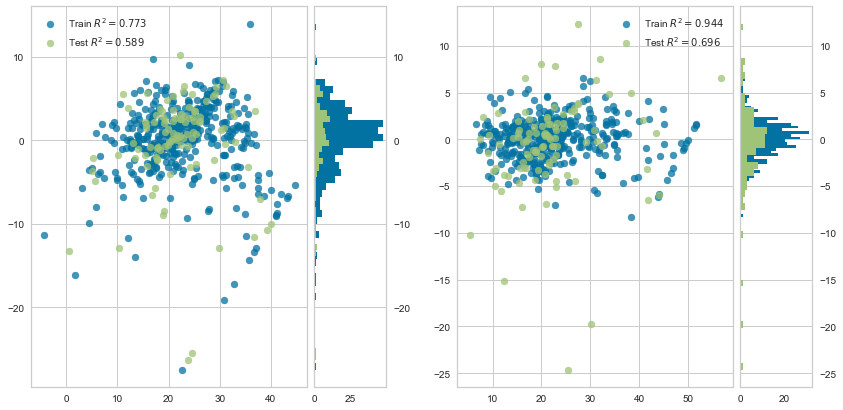




Selected Features for Training:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Transformations Selected


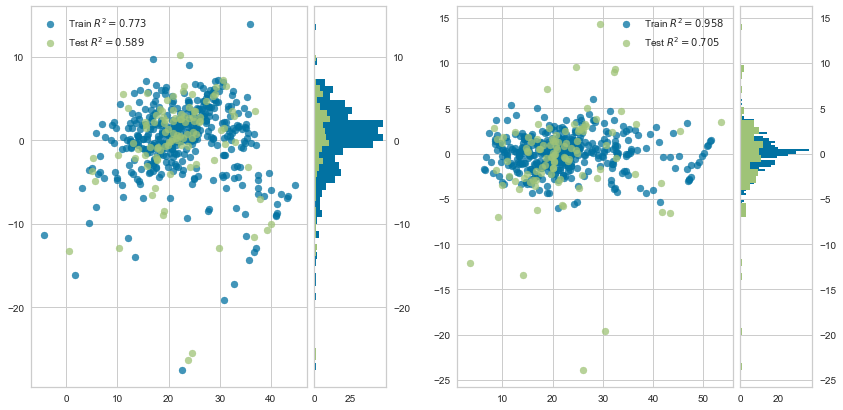

In [54]:
for i in range(1, len(features)+1):
    increamental_RFE(i)
    
    plt.show()
    print('\n\n')